#### Exercise 3.1

No. PLA will keep updating if the data is not linearly separable.

#### Exercise 3.2


In [1]:
# Add lib input sys.path
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import libs.linear_models as lm
import libs.data_util as data



In [20]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline




def generate_random_coeffs(dim):
    rn = data.generate_random_numbers(1, dim, 1000, -10, 10)
    return rn

def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = data.generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def get_true_random_funcs(N, dim, num_grid_points, lb, ub, coeff_lb, coeff_ub):
    rns = data.generate_random_numbers(N, dim, num_grid_points, lb, ub)
    rn_func = partial(data.generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
    coeffs = data.generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
    norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
    true_func = partial(true_f, coeffs = norm_coeffs)
    return true_func, rn_func, norm_coeffs

def gen_random_2class_data(N, dim,  num_grid_points, lb, ub, coeff_lb, coeff_ub):
    true_func, rn_func, norm_coeffs = get_true_random_funcs(N, dim, num_grid_points,
                                                            lb, ub, coeff_lb, coeff_ub)
    df = generate_df(N, dim, true_func, rn_func)
    return df, norm_coeffs

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        
def plot_data_hypothesis(df, xs, hypotheses, des_s):
    positives = df.loc[df['y']==1]
    negatives = df.loc[df['y']==-1]
    
    figsize = plt.figaspect(1)
    f, ax = plt.subplots(1, 1, figsize=figsize)

    ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
    ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')
    
    labels = []
    for g, des in zip(hypotheses, des_s):
        label = 'Hypothesis: ' + des
        labels.append(label)
        norm_g = g/g[-1]
        hypothesis = ax.plot(xs, -(norm_g[0]+norm_g[1]*xs), label=label)

    ax.set_ylabel(r"$x_2$", fontsize=11)
    ax.set_xlabel(r"$x_1$", fontsize=11)
    ax.axis('tight')
    legend_x = 2.0
    legend_y = 0.5
    ax.legend(labels + ['+1 labels', '-1 labels'], 
              loc='center right', bbox_to_anchor=(legend_x, legend_y))
    plt.show()

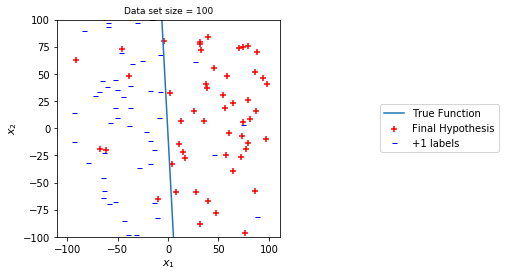

final Error Rate:  0.1
final normalized w: [-0.64483871 19.90322581  1.        ]
final Error Rate:  0.1
final normalized w: [-1.77688889 14.46666667  1.        ]
final Error Rate:  0.1
final normalized w: [-0.35070175 20.          1.        ]
final Error Rate:  0.1
final normalized w: [ 2.16108108 11.54054054  1.        ]
final Error Rate:  0.1
final normalized w: [ 1.11055556 20.55555556  1.        ]
final Error Rate:  0.1
final normalized w: [ 1.31081967 15.08196721  1.        ]
final Error Rate:  0.1
final normalized w: [-0.24679012 14.61728395  1.        ]
final Error Rate:  0.1
final normalized w: [ 0.         15.76086957  1.        ]
final Error Rate:  0.1
final normalized w: [-0.2315444  9.8030888  1.       ]
final Error Rate:  0.1
final normalized w: [-0.71758974 10.96923077  1.        ]
final Error Rate:  0.1
final normalized w: [ 0.         19.32352941  1.        ]
final Error Rate:  0.1
final normalized w: [-0.10357513 11.29015544  1.        ]
final Error Rate:  0.1
final no

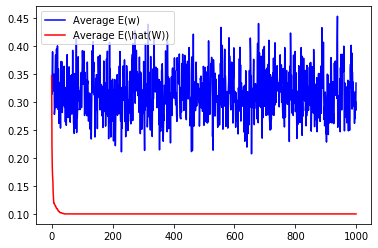

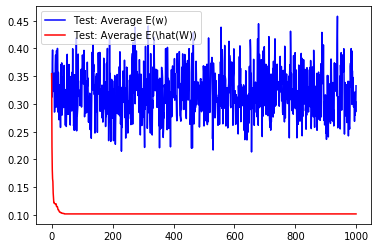

In [60]:
#### Exercise 3.2

lb, ub = -100, 100
N, dim = 100, 2 
num_grid_points = 2000
coeff_lb, coeff_ub = -10, 10
eta = 1
maxit = 1000
test_N = 1000

randomized, print_out = True, True
x1 = np.arange(lb, ub, 0.01)
#df, norm_coeffs = gen_random_2class_data(N, dim, num_grid_points, lb, ub, coeff_lb, coeff_ub)
true_func, rn_func, norm_coeffs = get_true_random_funcs(N, dim, num_grid_points,
                                           lb, ub, coeff_lb, coeff_ub)
df = generate_df(N, dim, true_func, rn_func)
test_df = generate_df(test_N, dim, true_func, rn_func)

flips = np.random.randint(N, size=(int(N/10), 1))
df.iloc[flips.flatten(), -1] = -df.iloc[flips.flatten(), ]['y']
plot_data(x1, df, norm_coeffs, None, lb, ub)

flips = np.random.randint(test_N, size=(int(test_N/10), 1))
test_df.iloc[flips.flatten(), -1] = -test_df.iloc[flips.flatten(), ]['y']

avg_w_ts, avg_what_ts = np.zeros(maxit), np.zeros(maxit)
avg_test_w_ts, avg_test_what_ts = np.zeros(maxit), np.zeros(maxit)
K = 20
for it in range(K):
    w, w_ts, what_ts, test_w_ts, test_what_ts = lm.pocket_algo(df.values, dim, 
                                                                maxit,eta, randomized, 
                                                                print_out, test_df.values)
    
    #print(w_ts.shape, what_ts.shape, test_w_ts.shape, test_what_ts.shape)
    avg_w_ts += w_ts
    avg_what_ts += what_ts
    avg_test_w_ts += test_w_ts
    avg_test_what_ts += test_what_ts
    
plt.plot(np.arange(len(avg_w_ts)), avg_w_ts/K, 'b', label='Average E(w)')
plt.plot(np.arange(len(avg_what_ts)), avg_what_ts/K, 'r', label='Average E(\hat(W))')
plt.legend()
plt.show()

plt.plot(np.arange(len(avg_test_w_ts)), avg_test_w_ts/K, 'b', label='Test: Average E(w)')
plt.plot(np.arange(len(avg_test_what_ts)), avg_test_what_ts/K, 'r', label='Test: Average E(\hat(W))')

plt.legend()
plt.show()


#### Exercise 3.3

1. (a) $H$ is symmetric.

\begin{align*}
H^T &= \left(X(X^TX)^{-1}X^T\right)^T\\
&= X(X^TX)^{-T}X^T\\
&= X(X^TX)^{-1}X^T\\
&= H\\
\end{align*}

1. (b) We show that $H^2=H$ first.

\begin{align*}
H^2 &= \left(X(X^TX)^{-1}X^T\right)\left(X(X^TX)^{-1}X^T\right)\\
&= X(X^TX)^{-1}(X^TX)(X^TX)^{-1}X^T\\
&= X(X^TX)^{-1}X^T\\
&= H\\
\end{align*}

Apply the above relationship repeatedly for $H^K$ we see that $H^K = H$.

1. (c) First show $(I-H)^2=I-H$.

\begin{align*}
(I-H)^2 &= (I-H)(I-H)\\
&= II - IH -HI + H^2\\
&= I - 2H + H^2\\
&= I-2H + H\\
&= I-H\\
\end{align*}

Apply above relationship repeatedly for $(I-H)^K$, we have $(I-H)^K = I-H$.

1. (d) Let $A=X(X^TX)^{-1}$, $B=X^T$, apply the property $\text{trace}(AB)=\text{trace}(BA)$, we have

\begin{align*}
\text{trace}(H) &= \text{trace}\left(X(X^TX)^{-1}X^T\right)\\
&= \text{trace}\left(AB\right)\\
&= \text{trace}\left(BA\right)\\
&=\text{trace}\left(X^TX(X^TX)^{-1}\right)\\
&=\text{trace}\left(I\right)\\
&= d+1\\
\end{align*}

where the identity matrix $I$ is of size $d+1$.

#### Exercise 3.4

1. (a) We have $y = Xw^{*}+\epsilon$, take this into the expression for in-sample estimate of $y$ is $\hat{y}$, we have

\begin{align*}
\hat{y} &= Hy\\
&= H(Xw^{*} + \epsilon)\\
&= Hxw^{*} + H\epsilon\\
&= X(X^TX)^{-1}X^TXw^{*} + H\epsilon\\
&= Xw^{*} + H\epsilon\\
\end{align*}

1. (b) The in-sample error vector is:

\begin{align*}
\hat{y} -  y &= Xw^{*} + H\epsilon - (Xw^{*} + \epsilon)\\
&= (H-I)\epsilon\\
\end{align*}

1. (c) 

\begin{align*}
E_{in}(w_{lin}) &= \frac{1}{N}\|Xw_{lin}-y\|^2\\
&= \frac{1}{N}\|y-\hat{y}\|^2\\
&= \frac{1}{N}\|(I-H)\epsilon\|^2\\
&= \frac{1}{N}\epsilon^T(I-H)^T(I-H)\epsilon\\
&= \frac{1}{N}\epsilon^T(I-H^T)(I-H)\epsilon\\
&= \frac{1}{N}\epsilon^T(I-H)(I-H)\epsilon\\
&= \frac{1}{N}\epsilon^T(I-H)\epsilon\\
\end{align*}

1. (d)

\begin{align*}
E_{\mathcal{D}}\left[E_{in}(w_{lin})\right] &= E_{\mathcal{D}}\left[\frac{1}{N}\epsilon^T(I-H)\epsilon\right]\\
&= \frac{1}{N}\left(E_{\mathcal{D}}[\epsilon^T\epsilon]-E_{\mathcal{D}}[\epsilon^TH\epsilon]\right)\\
&= \frac{1}{N}\left(E_{\mathcal{D}}[\sum^N_{k=1}\epsilon_k^2]-E_{\mathcal{D}}[\sum^N_{i=1}\sum^N_{j=1}\epsilon_ih_{ij}\epsilon_j]\right)\\
&= \frac{1}{N}\left(\sum^N_{k=1}E_{\mathcal{D}}\epsilon_k^2-\sum^N_{i=1}\sum^N_{j=1}E_{\mathcal{D}}[\epsilon_ih_{ij}\epsilon_j]\right)\\
&= \frac{1}{N}\left(N\sigma^2-\sum^N_{i=1}E_{\mathcal{D}}[\epsilon_i^2h_{ii}]\right)\\
&= \frac{1}{N}\left(N\sigma^2-\sum^N_{i=1}h_{ii}E_{\mathcal{D}}[\epsilon_i^2]\right)\\
&= \frac{1}{N}\left(N\sigma^2-\sigma^2\text{trace}(H)\right)\\
&= \sigma^2\left(1-\frac{\text{trace}(H)}{N}\right)\\
&= \sigma^2\left(1-\frac{d+1}{N}\right)\\
\end{align*}

Here we used the independence of $\epsilon_i$, and also we assume $H$ is not random variable, so we are not doing expectation w.r.t. $x$, that's how we can pull $h_{ii}$ out of $E_{\mathcal{D}}[\epsilon_i^2h_{ii}]$.

1. (e) Since $X$ doesn't change, only $\epsilon$ changes, we have

\begin{align*}
\hat{y} -  y^\prime &= Xw^{*} + H\epsilon - (Xw^{*} + \epsilon^\prime)\\
&= H\epsilon - \epsilon^\prime\\
\end{align*}

Following the procedure in problem (c) and (d), we have

\begin{align*}
E_{\mathcal{D,\epsilon'}}\left[E_{test}(w_{lin})\right] &= E_{\mathcal{D},\epsilon'}\left[\frac{1}{N}\|y' - \hat{y}\|^2\right]\\
&= E_{\mathcal{D},\epsilon'}\left[\frac{1}{N}\|\epsilon' - H\epsilon\|^2\right]\\
&= \frac{1}{N}E_{\mathcal{D},\epsilon'}\left[(\epsilon' - H\epsilon)^T(\epsilon' - H\epsilon)\right]\\
&= \frac{1}{N}E_{\mathcal{D},\epsilon'}\left[(\epsilon^{\prime T} - \epsilon^TH^T)(\epsilon' - H\epsilon)\right]\\
&= \frac{1}{N}E_{\mathcal{D},\epsilon'}\left[(\epsilon^{\prime T} - \epsilon^TH)(\epsilon' - H\epsilon)\right]\\
&= \frac{1}{N}E_{\mathcal{D},\epsilon'}\left[\epsilon^{\prime T}\epsilon' - \epsilon^{\prime T}H\epsilon-\epsilon^TH\epsilon' + \epsilon^THH\epsilon\right]\\
&= \frac{1}{N}E_{\mathcal{D},\epsilon'}\left[\epsilon^{\prime T}\epsilon' - \epsilon^{\prime T}H\epsilon-\epsilon^TH\epsilon' + \epsilon^TH\epsilon\right]\\
&= \frac{1}{N}E_{\mathcal{D},\epsilon'}\left[\epsilon^{\prime T}\epsilon' + \epsilon^TH\epsilon\right]\\
&= \frac{1}{N}\left(\sum^N_{k=1}E_{\mathcal{D}}\epsilon_k^{\prime 2} + \sum^N_{i=1}\sum^N_{j=1}E_{\mathcal{D}}[\epsilon_ih_{ij}\epsilon_j]\right)\\
&= \sigma^2\left(1+\frac{d+1}{N}\right)\\
\end{align*}


Where we have used the fact that $\epsilon$ and $\epsilon^\prime$ are independent of each other and each $\epsilon_k$ and $\epsilon_k^\prime$ are independent among themselves. 

#### Exercise 3.5

1. (a) 

\begin{align*}
\tanh(s) &= \frac{e^s - e^{-s}}{e^s + e^{-s}}\\
&= \frac{e^{2s} - 1}{1+e^{2s}}\\
&= \theta(2s) - \frac{1}{1+e^{2s}}\\
&= \theta(2s) - (1-\theta(2s))\\
&= 2\theta(2s) - 1\\
\end{align*}

1. (b)

\begin{align*}
\tanh(s) &= \frac{e^s - e^{-s}}{e^s + e^{-s}}\\
&= \frac{1-e^{-2s}}{1+e^{-2s}}\\
\end{align*}

Let $s\to \infty$, we have $e^{-2s} \to 0$, thus $\tanh(s) \to 1$.
Similarly, when $s\to -\infty$, $\tanh(s) \to -1$.

It's also easy to see that $\tanh(s) \lt 1$ and $\tanh(s) \gt -1$. So $-1$ and $1$ are hard thresholds for $\tanh(s)$ when $|s|$ is large. 

When $|s|$ is small, consider Taylor expansion of $e^s = 1 + s + \frac{s^2}{2}+O(s^3)$, then $e^{-s} = 1-s+\frac{s^2}{2}-O(s^3)$, we have $\tanh(s)=\frac{e^s-e^{-s}}{e^s+e^{-s}} = \frac{2s+2O(s^3)}{2+s^2} \approx s$.

So $\tanh(s)$ is approximately linear when $|s|$ is small. There's no threshold in this case. 

#### Exercise 3.6

1. (a) The probability to get $y_n$ is $P(y_n|x_n)$, by maximum likelihood method, we need maximize the likelihood, $\prod^N_{n=1} P(y_n|x_n)$, this is equivalent to maximize the logrithm of it: $\sum^N_{n=1}\ln(P(y_n|x_n))$, or minimize the negative of it: $-\sum^N_{n=1}\ln(P(y_n|x_n))$

When $y_n=+1$, $P(y_n|x_n)=h(x_n)$, and when $y_n=-1$, $P(y_n|x_n) = 1-h(x_n)$, separate the cases for $y_n=1$ and $y_n=-1$, we have:

\begin{align*}
E_{in}(w) &= -\sum^N_{n=1}\ln(P(y_n|x_n)) \\
&= -\sum^N_{n=1} I(y_n=+1)\ln h(x_n) + I(y_n=-1)\ln(1-h(x_n))\\
&= \sum^N_{n=1} I(y_n=+1)\ln\frac{1}{h(x_n)} + I(y_n=-1)\ln\frac{1}{(1-h(x_n))}\\
\end{align*}

1. (b) For $h(x) = \theta(w^Tx) = \frac{e^{w^Tx}}{1+e^{w^Tx}}$, we have $\ln \frac{1}{h(x_n)} = \ln (1+e^{-w^Tx_n})$ and $\ln \frac{1}{(1-h(x_n))} = \ln (1+e^{w^Tx_n})$. Combine them together we have

\begin{align*}
E_{in}(w) &= \sum^N_{n=1} I(y_n=+1)\ln (1+e^{-w^Tx_n}) + I(y_n=-1)\ln (1+e^{w^Tx_n})\\
&= \sum^N_{n=1}\ln (1+e^{-y_nw^Tx_n})\\
\end{align*}

Which is equivalent of minimizing the one in equation (3.9). 


#### Exercise 3.7

Take derivative of $E_{in}(w) = \frac{1}{N}\sum^N_{n=1}\ln (1+e^{-y_nw^Tx_n})$ with respect to $w$, we have: 

\begin{align*}
\nabla E_{in}(w) &= -\frac{1}{N}\sum^N_{n=1} \frac{y_nx_n e^{-y_nw^Tx_n}}{1+e^{-y_nw^Tx_n}}\\
 &= -\frac{1}{N}\sum^N_{n=1} \frac{y_nx_n }{1+e^{y_nw^Tx_n}}\\
&= \frac{1}{N}\sum^N_{n=1} -y_nx_n \theta(-y_nw^Tx_n)\\
\end{align*}

When a sample is misclassified, $y_nw^Tx_n \lt 0$, so $\theta(-y_nw^Tx_n) \gt 0.5$, while when a sample is correctly classified, $\theta(-y_nw^Tx_n) \lt 0.5$, so the contribution of 'misclassified' example is more to the gradient than a correctly classified one. 

#### Exercise 3.8 

$\hat{v}$ is the direction which gives largest decrease in $E_{in}$ only holds for small $\eta$, that's because when $\eta$ is large, we can't ignore the squared term and smaller terms in the Taylor expansion. The lower bound can't be achieved.

#### Exercise 3.9
1. (a) See plot below
1. (b) When $y = 1$
  * If $s \ge 0$, $e_{class}(s,y) = 0$, $e_{sq}(s,y) = (1-s)^2 \ge 0$
  * If $s \lt 0$, $e_{class}(s,y) = 1$, $e_{sq}(s,y) = (1-s)^2 = 1 - 2s + s^2 \gt 1$
  
  In both cases, we have $e_{sq}(s,y) \ge e_{class}(s,y)$. 
Similarly, we can prove that when $y=-1$, we have $e_{sq}(s,y) \ge e_{class}(s,y)$ as well.
So $e_{sq}(s,y) \ge e_{class}(s,y)$ for all cases of $s$ and $y$. The classification is upper bounded by the squared error. 


1. (c) When $y=1$, 
  * If $s \ge 0$, $e_{class}(s,y) = 0$, $e_{log}(s,y) = \ln(1+\exp(-ys)) = \ln(1+\exp(-s)) \ge \ln1 = 0$, also $\ln2 \gt 0$, so we have $\frac{1}{\ln2}e_{log}(s,y) \ge 0 = e_{class}(s,y)$.
  * If $s \lt 0$, $e_{class}(s,y) = 1$, $e_{log}(s,y) = \ln(1+\exp(-ys)) = \ln(1+\exp(-s)) \gt \ln2$, so $\frac{1}{\ln2}e_{log}(s,y) \gt 1 = e_{class}(s,y)$
  
  Similaly, we can prove that when $y=-1$, we have $\frac{1}{\ln2}e_{log}(s,y) \ge e_{class}(s,y)$ as well. 
The logistic regression is an upper bound to the classification error.

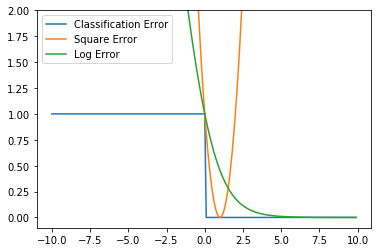

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(s):
    a = np.exp(s) - np.exp(-s)
    b = np.exp(s) + np.exp(-s)
    return a/b

def classification_error(s, y):
    signs = np.sign(s)
    return signs != y

def square_error(s, y):
    return (y-s)**2

def log_error(s, y):
    return np.log(1.0+np.exp(-y*s))

ss = np.arange(-10,10,0.1)
cls_err = classification_error(ss, 1)
sq_err = square_error(ss, 1)
log_err = log_error(ss, 1)/np.log(2)
plt.plot(ss, cls_err, label='Classification Error')
plt.plot(ss, sq_err, label='Square Error')
plt.plot(ss, log_err, label='Log Error')
plt.ylim(-0.1, 2)
plt.legend()
plt.show()

#### Exercise 3.10

1. (a) If $\eta = 1$, then the SGD algorithm will update the $w$ by: $w(t+1) = w(t) -\eta\nabla e_n(w)  = w(t) -\nabla e_n(w)$.

When $e_n(w) = \max(0, -y_n w^Tx_n)$, the derivative of $e_n(w)$ when $y_nw^Tx_n \gt 0$ (when the sample is correctly classified) is zero, the derivative is $-y_nx_n$ when $y_nw^Tx_n \lt 0$ (i.e. when the sample is misclassified). 

Take the derivatives into the SGD update equation, we see that's exactly PLA. 

1. (b) For logistic regression, we have $\nabla e_n(w) = \frac{-y_nx_n}{1+e^{y_nw^Tx_n}}$.
If $w$ is very large:
  * When $y_nw^Tx_n \gt 0$, $\nabla e_n(w) \approx 0$.
  * When $y_nw^Tx_n \le 0$, $\nabla e_n(w) \approx -y_nx_n$. 
  
The above results are consistent with the values used in PLA.

This is another indication that the logistic regression weights can be used as a good approximation for classification. 

#### Exercise 3.11

Feature transformation $\Phi(x) = (1, x^2_1, x^2_2)$, a hyperplane in $\mathcal{Z}$ can be expressed as $\tilde{w}z = \tilde{w}_0 z_0 + \tilde{w}_1 z_1 + \tilde{w}_2 z_2 = \tilde{w}_0 + \tilde{w}_1 x^2_1 + \tilde{w}_2 x^2_2 = 0$. 
1. (a) $|\tilde{w}_1| x^2_1 - |\tilde{w}_1| x^2_2 = c$ : Hyperbola

1. (b) $\tilde{w}_0 + \tilde{w}_1 x^2_1= 0$: It can be two vertical lines parallel to axis of $x1$.

1. (c) Ellipse.
1. (d) No solution. For any $x_1$ and $x_2$, $\tilde{w}z \gt 0$. So we can't find $\tilde{w}$ that satisfies the condition.

#### Exercise 3.12 TODO
 

#### Exercise 3.13 

$\Phi_2(x) = (1, x_1, x_2, x^2_1, x_1x_2, x^2_x)$, make the corresponding $\tilde{w}$ as $\tilde{w}_0, \dots, \tilde{w}_5$, we have

1. (a) $(x_1-3)^2 + x_2 -1 =-1 -6x_1 + x_2+ x^2_1$, we choose $\tilde{w}_0 = -1$, $\tilde{w}_1 = -6$, $\tilde{w}_2 = 1$, $\tilde{w}_3 = 1$, $\tilde{w}_4 = 0$, $\tilde{w}_5 = 0$.

1. (b) $(x_1-3)^2 + (x_2-4)^2 -1 = 24 - 6x_1 -8x_2 + x^2_1 + x^2_2$ , we choose $\tilde{w}_0 = 24$, $\tilde{w}_1 = -6$, $\tilde{w}_2 = -8$, $\tilde{w}_3 = 1$, $\tilde{w}_4 = 0$, $\tilde{w}_5 = 1$

1. (c) $2(x_1-3)^2 + (x_2-4)^2 -1 = 33 - 12x_1 -8x_2 + 2x^2_1 + x^2_2$, we choose $\tilde{w}_0 = 33$, $\tilde{w}_1 = -12$, $\tilde{w}_2 = -8$, $\tilde{w}_3 = 2$, $\tilde{w}_4 = 0$, $\tilde{w}_5 = 1$

1. (d) $(x_1-3)^2 - (x_2-4)^2 -1 = -8- 6x_1 + 8x_2 + x^2_1 - x^2_2$, we choose $\tilde{w}_0 = -8$, $\tilde{w}_1 = -6$, $\tilde{w}_2 = 8$, $\tilde{w}_3 = 1$, $\tilde{w}_4 = 0$,  $\tilde{w}_5 = -1$

1. (e) $2(x_1+x_2-3)^2 + (x_1-x_2-4)^2 -1 = 33- 20x_1 - 4x_2 + 3x^2_1+ 2x_1x_2 +3x^2_2$, we choose $\tilde{w}_0 = 33$, $\tilde{w}_1 = -20$, $\tilde{w}_2 = -4$, $\tilde{w}_3 = 1$, $\tilde{w}_4 = 0$, $\tilde{w}_5 = 3$

1. (f) $2x_1 + x_2 -1$, we choose $\tilde{w}_0 = -1$, $\tilde{w}_1 = 2$, $\tilde{w}_2 = 1$, $\tilde{w}_3 = 0$, $\tilde{w}_4 = 0$, $\tilde{w}_5 = 0$.

#### Exercise 3.14

Consider the $Q$th order polynomial transform $\Phi_{Q}$ for $\mathcal{X} = \mathcal{R}^d$. Let's count the terms with exactly $q$-degree that can be created with $x_1,x_2, \dots, x_d$. 
There are total of $q+d-1 \choose d-1$ such terms. See [Number of polynomial terms for certain degree and certain number of variables](https://mathoverflow.net/questions/225953/number-of-polynomial-terms-for-certain-degree-and-certain-number-of-variables/225963#225963).

So the total terms for the $Q$th order polynomical transform (which is also the dimensionality $\tilde{d}$ of the feature space $\mathcal{Z}$) is (Excluding the constant $1$):

\begin{align*}
\tilde{d}(d, Q) &= \sum^Q_{q=1}{ q+d-1 \choose d-1}\\
&= {d \choose d-1} + {d+1 \choose d-1} + \dots + {Q+d-1 \choose d-1}\\
&= {d \choose 1} + {d+1 \choose 2} + \dots + {Q+d-1 \choose Q}\\
&= ({d+1 \choose 1} -{d \choose 0}) + ({d+2 \choose 2} -{d+1 \choose 1}) + \dots + ({d+Q \choose Q} - {d+Q-1 \choose Q-1})\\
&= {d+Q \choose Q} - 1\\
\end{align*}

Where we have applied the equality: ${N \choose k} = {N-1 \choose k} + {N-1 \choose k-1}$

In [63]:
from scipy.special import comb
print('Feature Space Dimensionality')
ds = [2,3,5,10]
Qs = [2,3,5,10]
for d in ds:
    for Q in Qs:
        r = comb(d+Q, Q) - 1
        print('d = ', d, ' Q = ', Q, ': ', int(r))

Feature Space Dimensionality
d =  2  Q =  2 :  5
d =  2  Q =  3 :  9
d =  2  Q =  5 :  20
d =  2  Q =  10 :  65
d =  3  Q =  2 :  9
d =  3  Q =  3 :  19
d =  3  Q =  5 :  55
d =  3  Q =  10 :  285
d =  5  Q =  2 :  20
d =  5  Q =  3 :  55
d =  5  Q =  5 :  251
d =  5  Q =  10 :  3002
d =  10  Q =  2 :  65
d =  10  Q =  3 :  285
d =  10  Q =  5 :  3002
d =  10  Q =  10 :  184755


#### Exercise 3.15 TODO

#### Exercise 3.16

Steps of the algorithm that combines $\Phi_3$ with linear regression.

1. For each $x \in X$, apply $\Phi_3$ to obtain the matrix $Z$
1. Compute the pseudo-inverse $X^\dagger$ of the matrix $Z$
1. Return $w_{lin} = X^\dagger y$

If the dimension of data is large and the order of polynomial transformation is big, the resulting dimension in the feature space will grow in polynomial. The matrix $Z$ will be of size $N \times \tilde{d}$. The main computational cost will be spent on the calculation of the pseudo-inverse $X^\dagger$.

#### Problem 3.1

From the graphs below we can see that PLA and linear regression achieves very close solution. 
Consider a hyperplane $y = w_0 + w_1x_1 + w_2x_2$ for the $-1$ and $1$ points given $x$ in the space. 
Once we find the $w$ through linear regression, we let $w_0 + w_1x_1 + w_2x_2=0$, this hyperplane should approximately separate the points.


Number of positive points:  997
Number of negatives points:  1003
Final correctness:  2000 . Total iteration:  41
Final w: [39.          2.64724348 52.26554305]
Liner regression coefficients:  [ 0.24719806 -0.010201    0.07792978]


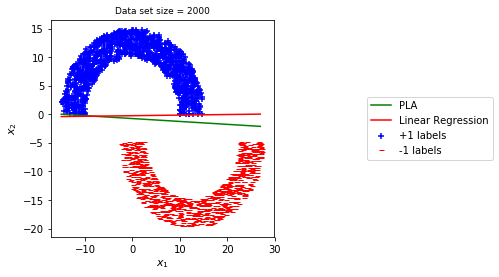

In [10]:
#### Problem 3.1 (a) 
N = 2000
max_v = 10000
rad, thk = 10, 5
sep = 5
eta = 1
use_adaline=False
maxit = 1000
dim = 2

radiuses, radians = data.generate_random_ring(N, rad, rad+thk, max_v)
xs, ys, signs = data.move_bottom_ring_and_assign(radiuses, radians, rad + thk/2.0, -sep)
df = pd.DataFrame({'x1':xs.flatten(), 'x2':ys.flatten(), 'y':signs.flatten()})
df['x0'] = 1
df = df[['x0','x1','x2','y']]
positives = df.loc[df['y']==1]
negatives = df.loc[df['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')
print('Number of positive points: ', len(positives))
print('Number of negatives points: ', len(negatives))

norm_g, num_its, _ = lm.perceptron(df.values, dim, maxit, use_adaline, eta, randomize=False, print_out = True)    
x1 = np.arange(-(rad+thk), (rad+thk)+rad + thk/2)
norm_g = norm_g/norm_g[-1]
hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'g', label='Final Hypothesis')

w_lin = lm.linear_regression(df[['x0','x1','x2']].values, df['y'].values)
print('Liner regression coefficients: ', w_lin)
linear = ax.plot(x1, -(w_lin[0]+w_lin[1]*x1), c = 'r', label='Linear Regression')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Data set size = %s'%N, fontsize=9)
ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(['PLA', 'Linear Regression', 
           '+1 labels', '-1 labels', ], 
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
#ax.set_ylim(bottom=lb, top=ub)
plt.show()


#### Problem 3.2

It generally takes more iterations for PLA to converge when 'sep' is small. Looks like $\|w\|$ is increasing when 'sep' is decreasing. According to problem 1.3, the $R$ term is fixed due to $x$ are fixed. The $\rho$ is the minimum of $y_nw^Tx_n$, which is less affected by the change of $\|w\|$. So the overall effect is to increase the time to converge for PLA.

Final correctness:  2000 . Total iteration:  199
Final w: [ 25.          -1.28056494 133.40804478]
Final correctness:  2000 . Total iteration:  113
Final w: [ 47.          -3.44826697 124.55915407]
Final correctness:  2000 . Total iteration:  82
Final w: [54.         -3.87807228 98.26596635]
Final correctness:  2000 . Total iteration:  85
Final w: [ 55.          -3.98647007 102.80816471]
Final correctness:  2000 . Total iteration:  18
Final w: [10.          0.23283782 43.83870834]
Final correctness:  2000 . Total iteration:  11
Final w: [ 7.         -0.1939142  30.78323126]
Final correctness:  2000 . Total iteration:  11
Final w: [ 7.         -0.1939142  31.18323126]
Final correctness:  2000 . Total iteration:  11
Final w: [ 7.         -0.1939142  31.58323126]
Final correctness:  2000 . Total iteration:  11
Final w: [ 7.         -0.1939142  31.98323126]
Final correctness:  2000 . Total iteration:  11
Final w: [ 7.         -0.1939142  32.38323126]
Final correctness:  2000 . Total iterat

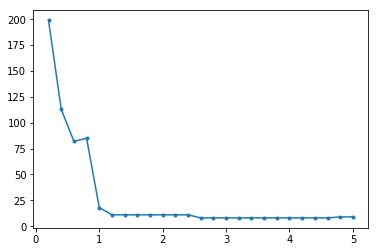

In [11]:
#### Problem 3.2
N = 2000
max_v = 10000
rad, thk = 10, 5
eta = 1
use_adaline=False
maxit = 1000
dim = 2
seps = np.arange(0.2, 5.2, 0.2)

radiuses, radians = data.generate_random_ring(N, rad, rad+thk, max_v)
its, threoticals_ts = [], []
for sep in seps:
    xs, ys, signs = data.move_bottom_ring_and_assign(radiuses, radians, rad + thk/2.0, -sep)
    df = pd.DataFrame({'x1':xs.flatten(), 'x2':ys.flatten(), 'y':signs.flatten()})
    df['x0'] = 1
    df = df[['x0','x1','x2','y']]
    positives = df.loc[df['y']==1]
    negatives = df.loc[df['y']==-1]
    norm_g, num_its, theoretical_t = lm.perceptron(df.values, dim, maxit, use_adaline, eta, 
                                                   randomize=False, print_out = True)
    its.append(num_its)
    threoticals_ts.append(theoretical_t)

plt.plot(seps, its, marker='.')
#plt.plot(seps, threoticals_ts, marker='.') # The theoretical ts are too large, in the order of 1e7

#### Problem 3.3

1. (a) If $sep=-5$, that means the points are not separable by a line. If we run PLA on those examples, the PLA algorithm will never stop.

1. (d) It takes much much longer to run pocket algorithm than linear regression (in this case, about 30000 times slower). This is because at each iteration we need to recompute the in sample error in pocket algorithm. 

The quality of pocket solution seems to be better than linear regression though. It has less mis-classified points.

final Error Rate:  0.079
final normalized w: [-1.56463472 -0.14400001  1.        ]


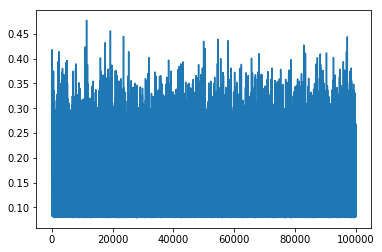

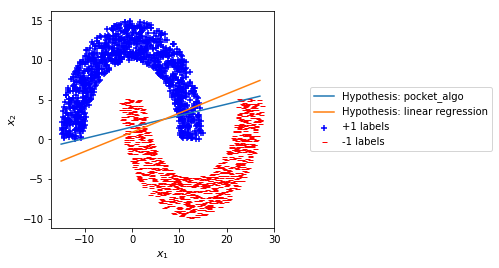

In [6]:
#### Problem 3.3 (b)-(e)
N = 2000
max_v = 10000
rad, thk = 10, 5
eta = 1
use_adaline=False
maxit = 100000
dim = 2
sep = -5
randomized, print_out = True, True

radiuses, radians = data.generate_random_ring(N, rad, rad+thk, max_v)
xs, ys, signs = data.move_bottom_ring_and_assign(radiuses, radians, rad + thk/2.0, -sep)
df = pd.DataFrame({'x1':xs.flatten(), 'x2':ys.flatten(), 'y':signs.flatten()})
df['x0'] = 1
df = df[['x0','x1','x2','y']]
    
w_pocket, w_ts, what_ts, test_w_ts, test_what_ts = lm.pocket_algo(df.values, dim, 
                                                           maxit,eta, randomized, 
                                                           print_out, None)

plt.plot(w_ts)

w_lin = lm.linear_regression(df[['x0','x1','x2']].values, df['y'].values)
xs = np.arange(-(rad+thk), (rad+thk)+rad + thk/2)
plot_data_hypothesis(df, xs, [w_pocket, w_lin], ['pocket_algo', 'linear regression'])

final Error Rate:  0.0345
final normalized w: [-3.87198093 -3.88535272 -1.33406246  5.49714086  6.89048836 -7.47225709
 -0.80807891  0.36033478 -0.46447154  1.        ]
Pocket algorithm time:  275.1863398551941
Linear Regression time:  0.001995086669921875


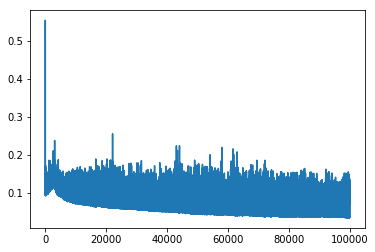

In [109]:
#### Problem 3.3 (e)
import time


def polynomial_transformation_2v(df):
    df['x1x2'] = df['x1']*df['x2']
    df['x1_sq'] = df['x1']*df['x1']
    df['x2_sq'] = df['x2']*df['x2']
    df['x2x1_sq'] = df['x2']*df['x1_sq']
    df['x1x2_sq'] = df['x1']*df['x2_sq']
    df['x1_cu'] = df['x1_sq']*df['x1']
    df['x2_cu'] = df['x2_sq']*df['x2']
    df = df[['x0','x1','x2', 
             'x1x2', 'x1_sq', 'x2_sq', 
             'x1x2_sq', 'x2x1_sq', 'x1_cu', 'x2_cu', 
             'y']]
    return df

df_poly = polynomial_transformation_2v(df)
dim_poly = 9
start = time.time()
w_pocket, w_ts, what_ts, test_w_ts, test_what_ts = lm.pocket_algo(df_poly.values, dim_poly, 
                                                                  maxit,eta, randomized, 
                                                                  print_out, None)
end = time.time()
print("Pocket algorithm time: ", end-start)

plt.plot(w_ts)
start = time.time()
w_lin = lm.linear_regression(df_poly[['x0','x1','x2', 'x1x2', 'x1_sq', 'x2_sq', 
                                      'x1x2_sq', 'x2x1_sq', 'x1_cu', 'x2_cu']].values, 
                             df_poly['y'].values)
end = time.time()
print("Linear Regression time: ", end-start)
xs = np.arange(-(rad+thk), (rad+thk)+rad + thk/2, 0.1)

In [110]:
def poly3(x2, x1, w):
    return (w[0] + w[1]*x1 + w[2]*x2 + w[3]*x1*x2
            + w[4]*x1**2 + w[5]*x2**2 + w[6]*x1*x2**2
            + w[7]*x2*x1**2 + w[8]*x1**3+w[9]*x2**3
           )

def get_coeffs(w, x1):
    return [w[9], 
            w[6]*x1+w[5], 
            w[7]*x1**2+w[3]*x1+w[2], 
            w[8]*x1**3+w[4]*x1**2+w[1]*x1+w[0]]

def deriv(x2, x1, w):
    return (3*w[9]*x2**2 + w[7]*x1**2+2*w[6]*x1*x2+2*w[5]*x2+w[3]*x1+w[2])

from functools import partial
import scipy.optimize
from scipy.optimize import minimize
#p3 = partial(poly3, x1= x, w= w_lin)
#d3 = partial(deriv, x1= x, w= w_lin)
#res = minimize(p3, 0, method='BFGS', jac=d3, tol=1e-12)

def find_poly_roots(xs, w):
    x2s1, x2s2, x2s3, vs = [], [], [], []
    for x in xs:
        coeffs = get_coeffs(w, x)
        roots = np.roots(coeffs)
        r1, r2, r3 = roots
        if np.iscomplex(roots[0]):
            if np.iscomplex(roots[1]):
                r1 = r3
                r2 = r3
            elif np.iscomplex(roots[2]):
                r1 = r2
                r3 = r2
        elif np.iscomplex(roots[1]):
            r2 = r1
            r3 = r1

        x2s1.append(r1)
        x2s2.append(r2)
        x2s3.append(r3)
    return x2s1, x2s2, x2s3

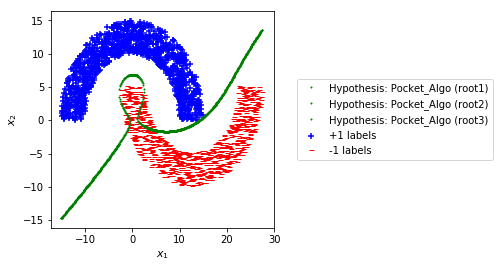

In [107]:
#### Problem 3.3 (e) Polynomial transformation with Pocket algorithm

positives = df_poly.loc[df_poly['y']==1]
negatives = df_poly.loc[df_poly['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)
ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')

labels= ['Hypothesis: Pocket_Algo (root1)', 
         'Hypothesis: Pocket_Algo (root2)', 
         'Hypothesis: Pocket_Algo (root3)']

x2s1, x2s2, x2s3 = find_poly_roots(xs, w_pocket)
hypothesis = ax.plot(xs, x2s1, marker='.', markersize='2', color='g', linestyle="")
hypothesis = ax.plot(xs, x2s2, marker='.', markersize='2', color='g', linestyle="")
hypothesis = ax.plot(xs, x2s3, marker='.', markersize='2', color='g', linestyle="")

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
#ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(labels + ['+1 labels', '-1 labels'], 
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
plt.show()

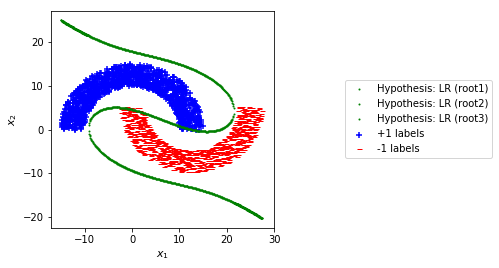

In [111]:
#### Problem 3.3 (e) Polynomial transformation with Linear Regression
positives = df_poly.loc[df_poly['y']==1]
negatives = df_poly.loc[df_poly['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)
ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')

labels= ['Hypothesis: LR (root1)', 
         'Hypothesis: LR (root2)', 
         'Hypothesis: LR (root3)']

x2s1, x2s2, x2s3 = find_poly_roots(xs, w_lin)
hypothesis = ax.plot(xs, x2s1, marker='.', markersize='2', color='g', linestyle="")
hypothesis = ax.plot(xs, x2s2, marker='.', markersize='2', color='g', linestyle="")
hypothesis = ax.plot(xs, x2s3, marker='.', markersize='2', color='g', linestyle="")

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
#ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(labels + ['+1 labels', '-1 labels'], 
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
plt.show()

#### Problem 3.4

1. (a) 

  * If $y_nw^Tx_n \gt 1$, then we have $E_n(w) = 0$, which is continus and differentiable.
  * If $y_nw^Tx_n \lt 1$, then we have $E_n(w) = (1-y_nw^Tx_n)^2 $, a polynomial function on $w$, which is also continuous and differentiable. 
  * If $y_nw^Tx_n = 1$, we have $w^Tx_n=y_n$, both above functions converge to $E_n(w^*) = 0$ at this point. So $E_n(w)$ is continuous at this $w$.
  
  Take the derivative of $(1-y_nw^Tx_n)^2 $, we have $\frac{\partial{E_n(w)}}{\partial{w}} = -2y_nx_n(1-y_nw^Tx_n) $, which equals to zero when $w^Tx_n=y_n$. This proves that the function $E_n(w)$ is differentiable everywhere. 

1. (b) 
  * If $y_n \gt 0$ and $w^Tx_n \ge 0$, then $E_n(w) \ge 0 = sign(w^Tx_n\ne y_n)$.
  * If $y_n \gt 0$ and $w^Tx_n \lt 0$, then $E_n(w) = \left(\max(0,1-y_nw^Tx_n)\right)^2 = \left(1-y_nw^Tx_n\right)^2\gt 1 = sign(w^Tx_n \ne y_n)$ because $-y_nw^Tx_n \gt 0$.
  
    Similarly we can prove the same thing when $y_n \le 0$. So $E_n(w)$ is an upper bound for $sign(w^Tx_n)\ne y_n$.

    Hence $\frac{1}{N}\sum^N_{n=1}E_n(w)$ is an upper bound for the in-sample classification error $E_in(w)$.

1. (c) From problem (a), we have $\frac{\partial{E_n(w)}}{\partial{w}} = -2y_nx_n(1-y_nw^Tx_n)$ when 
$y_nw^Tx_n \lt 1$ and $\frac{\partial{E_n(w)}}{\partial{w}} = 0$ when $y_nw^Tx_n \ge 1$. Let $x_n$ and $y_n$ be the example picked at time $t$ and $s_t = w^T(t)x_n$. The update formula for SGD is thus: 

\begin{align*}
w(t+1) &= w(t) - \eta \frac{\partial{E_n(w)}}{\partial{w}}\\
&= \left\{\begin{array}{l}
w(t) - \eta \times 0 &\mbox{if $y_nw^T(t)x_n \gt 1$}\\
w(t) - \eta\left(-2y_nx_n(1-y_nw^T(t)x_n)\right) &\mbox{if $y_nw^T(t)x_n \le 1$}
\end{array}\right.\\
&= \left\{\begin{array}{l}
w(t) &\mbox{if $y_ns_t \gt 1$}\\
w(t)+2\eta y_nx_n(1-y_ns_t) &\mbox{if $y_ns_t \le 1$}
\end{array}\right.\\
&= \left\{\begin{array}{l}
w(t) &\mbox{if $y_ns_t \gt 1$}\\
w(t)+2\eta(y_n-y_ny_ns_t)x_n &\mbox{if $y_ns_t \le 1$}
\end{array}\right.\\
&= \left\{\begin{array}{l}
w(t) &\mbox{if $y_ns_t \gt 1$}\\
w(t)+2\eta(y_n-s_t)x_n &\mbox{if $y_ns_t \le 1$}
\end{array}\right.\\
\end{align*}

Note we used the fact that $s_t$ is scalar, and moved $x_n$ outside of the brackets.
Take $\eta^{'} = 2\eta$,we recover the Adaline algorithm. 

#### Problem 3.5
1. (a)   
  * If $y_nw^Tx_n \gt 1$, then we have $E_n(w) = 0$, which is continus and differentiable.
  * If $y_nw^Tx_n \lt 1$, then we have $E_n(w) = 1-y_nw^Tx_n$, a linear function in $w$, which is also continuous and differentiable. 
  * If $y_nw^Tx_n = 1$, we have $w^Tx_n=y_n$, both above functions converge to $E_n(w^*) = 0$ at this point. So $E_n(w)$ is continuous at this $w$.
  
  Take the derivative of $1-y_nw^Tx_n$, we have $\frac{\partial{E_n(w)}}{\partial{w}} = -y_nx_n$, which doesn't equal to zero when $w^Tx_n=y_n$. This says that the function $E_n(w)$ is  differentiable everywhere except when $w^Tx_n=y_n$. 
  
1. (b) 
  * If $y_n \gt 0$ and $w^Tx_n \ge 0$, then $E_n(w) = \max(0,1-y_nw^Tx_n) \ge 0 = sign(w^Tx_n\ne y_n)$.
  * If $y_n \gt 0$ and $w^Tx_n \lt 0$, then $E_n(w) =\max(0,1-y_nw^Tx_n) = 1-y_nw^Tx_n \gt 1 = sign(w^Tx_n \ne y_n)$ because $-y_nw^Tx_n \gt 0$.
  
    Similarly we can prove the same thing when $y_n \le 0$. So $E_n(w)$ is an upper bound for $sign(w^Tx_n)\ne y_n$.

    Hence $\frac{1}{N}\sum^N_{n=1}E_n(w)$ is an upper bound for the in-sample classification error $E_in(w)$.
    
    
1. (c) From problem (a), we have $\frac{\partial{E_n(w)}}{\partial{w}} = -y_nx_n$ when 
$y_nw^Tx_n \lt 1$ and $\frac{\partial{E_n(w)}}{\partial{w}} = 0$ when $y_nw^Tx_n \ge 1$. Let $x_n$ and $y_n$ be the example picked at time $t$. The update formula for SGD is thus: 

\begin{align*}
w(t+1) &= w(t) - \eta \frac{\partial{E_n(w)}}{\partial{w}}\\
&= \left\{\begin{array}{l}
w(t) - \eta \times 0 &\mbox{if $y_nw^T(t)x_n \gt 1$}\\
w(t) - \eta\left(-y_nx_n\right) &\mbox{if $y_nw^T(t)x_n \le 1$}
\end{array}\right.\\
&= \left\{\begin{array}{l}
w(t) &\mbox{if $y_ns_t \gt 1$}\\
w(t)+\eta y_nx_n &\mbox{if $y_ns_t \le 1$}
\end{array}\right.\\
\end{align*}


Take $\eta =1$,we recover the Perceptron Learning Algorithm.     

#### Problem 3.6

* (a) For linearly separable data, there exists a plane that can separate them. Suppose the norm of the plane is $w_0$, then for all points $x_n$, we have $y_nw_0^Tx_n \gt 0$. We can scale $w_0$ up by a scalar $a \gt 1$ that makes $y_n(aw_0)^Tx_n \ge 1$. Thus $w = aw_0$ exists.

* (b) To find the $w$, we want the sum of $y_n(w^Tx_n)$ to be as large as possible but as we see from problem (a), we can increase $w$ to make the sum as large as possible. To find a solution, we instead minimize the sum while looking for solutions that satisfy the constraints, which will make sure that we find a solution. So we have following linear program:

\begin{align*}
\min_{w} \sum^N_{n=1} y_n(w^Tx_n)\\
\text{subject to} \;\; -y_nw^Tx_n \le -1 \text{ for } n=1,\dots,N
\end{align*}

The minimal sum will be $N$. 

Here $z=(w_1,\dots,w_d)^T$, $c^T = \left(\sum^N_{k=1}y_kx_{k1},\dots, \sum^N_{k=1}y_kx_{kd},\right)$, $b=-1$ and 

$A=\begin{bmatrix} 
-y_1x_{11} & \dots & -y_1x_{1d}\\ 
\dots &\dots \dots\\
-y_kx_{k1} & \dots & -y_kx_{kd}\\ 
\dots &\dots \dots\\
-y_Nx_{N1} & \dots & -y_Nx_{Nd}\\ 
\end{bmatrix}
$

* (c) Re-formulate the problem as a linear program.

\begin{align*}
\min_{w,\xi_n}\sum^N_{n=1}\xi_n\\
\text{subject to} \\
-\xi_n -y_n(w^Tx_n) \le -1\\
-\xi_n \le 0
\end{align*}

Then we have 

\begin{align*}
z &= \left[\xi_1,\dots,\xi_n,w_1,\dots,w_d\right]^T\\
c &= \left[1,\dots,1,0,\dots,0\right]^T\\
b &= \left[-1,\dots,-1,0,\dots,0\right]^T_{(n+d)\times 1}\\
A &= \begin{bmatrix}
-1 & 0 & \dots & 0 & -y_1x_{11} & \dots & -y_1x_{1d}\\
0 & -1 & \dots & 0 & -y_2x_{21} & \dots & -y_2x_{2d}\\
\dots &\dots & \dots & \dots &\dots & \dots & \dots\\
0 & 0 & \dots & -1 & -y_nx_{n1} & \dots & -y_nx_{nd}\\
-1 & 0 & \dots & 0 & 0 & \dots & 0\\
0 & -1 & \dots & 0 & 0 & \dots & 0\\
\dots &\dots & \dots & \dots &\dots & \dots & \dots\\
0 & 0 & \dots & -1 & 0 & \dots & 0\\
\end{bmatrix}_{(n+n,n+d)}\\
\end{align*}

* (d) Suppose $w$ and $\xi$ are the optimal values found by the linear program in problem (c), we claim that $w$ also minimize the equation in problem (3.5), i.e. $\frac{1}{N}\sum^N_{n=1}E_n(w) = \frac{1}{N}\sum^N_{n=1}max(0, 1-y_nw^Tx_n)$. Otherwise, there exists another $w'$ such that $\frac{1}{N}\sum^N_{n=1}E_n(w) \gt \frac{1}{N}\sum^N_{n=1}E_n(w')$.

On the other hand, since the optimal $\xi$ satisfies the two contraints, we have $y_n(w^Tx_n) \ge 1-\xi_n$ and $\xi_n \ge 0$, which is equivalent to $\xi_n \ge max(0, 1-y_n(w^Tx_n))$. So we have $\sum^N_{n=1}\xi_n = \sum^N_{n=1}max(0, 1-y_n(w^Tx_n))$ which is minimial by the set up of problem (c). However, this contradicts the assumption above that there exists another $w'$ that can achieves lower sum. So we conclude that the solutions found by problem (c) also minimizes equation in problem 3.5.

Now we assume $w$ minimizes equation in problem 3.5, as shown in above, it minimizes $\sum^N_{n=1}max(0, 1-y_n(w^Tx_n)) =\sum^N_{n=1}\xi_n$ where $\xi_n$ satisfies the two constraints in problem (c).

Combine the two arguments, we conclude that problem (c) and problem 3.5 optimizations are equivalent.

#### Problem 3.7

Number of positive points:  1023
Number of negatives points:  977


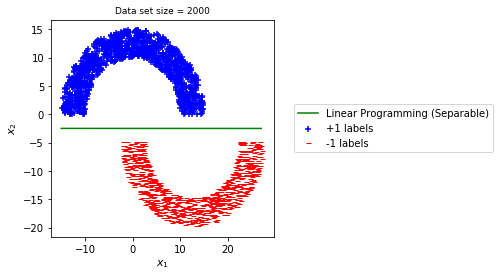

     con: array([], dtype=float64)
     fun: 8337.750936051727
 message: 'Optimization terminated successfully.'
     nit: 12
   slack: array([4.0237619 , 2.58730323, 3.26863103, ..., 3.41969709, 4.25790331,
       2.06756635])
  status: 0
 success: True
       x: array([9.92419060e-01, 6.04367241e-05, 3.98226621e-01])
(2000,) (2000, 3)


In [62]:
#### Problem 3.7
from scipy.optimize import linprog
N = 2000
max_v = 10000
rad, thk = 10, 5
sep = 5
eta = 1
use_adaline=False
maxit = 1000
dim = 2

radiuses, radians = data.generate_random_ring(N, rad, rad+thk, max_v)
xs, ys, signs = data.move_bottom_ring_and_assign(radiuses, radians, rad + thk/2.0, -sep)
df = pd.DataFrame({'x1':xs.flatten(), 'x2':ys.flatten(), 'y':signs.flatten()})
df['x0'] = 1
df = df[['x0','x1','x2','y']]
positives = df.loc[df['y']==1]
negatives = df.loc[df['y']==-1]

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')
print('Number of positive points: ', len(positives))
print('Number of negatives points: ', len(negatives))

#### problem 3.7 (b)(d) Separable Points
df['yx0'] = df['y']*df['x0']
df['yx1'] = df['y']*df['x1']
df['yx2'] = df['y']*df['x2']

def prepare_seperable_c(df):
    c = [np.sum(df['yx0']), np.sum(df['yx1']), np.sum(df['yx2'])]
    return c

def prepare_seperable_A_b(df):
    b = -np.ones(len(df))
    A = -df[['yx0', 'yx1', 'yx2']].values
    return A, b

c = prepare_seperable_c(df)
A,b = prepare_seperable_A_b(df) 

w0_bounds = (None, None)
w1_bounds = (None, None)
w2_bounds = (None, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[w0_bounds, w1_bounds, w2_bounds], method='interior-point')

x1 = np.arange(-(rad+thk), (rad+thk)+rad + thk/2)
norm_g = res.x/res.x[-1]
hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'g', label='Final Hypothesis')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Data set size = %s'%N, fontsize=9)
ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(['Linear Programming (Separable)', 
           '+1 labels', '-1 labels', ], 
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
plt.show()
print(res)
print(b.shape, A.shape)

Number of positive points:  981
Number of negatives points:  1019
(4000, 2003) (4000,)


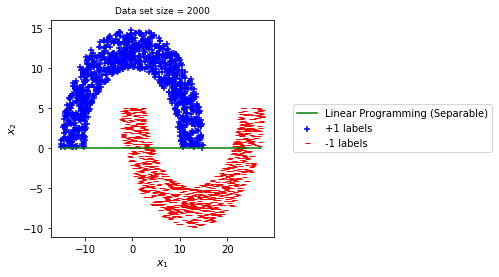

In [63]:
from scipy.optimize import linprog
N = 2000
max_v = 10000
rad, thk = 10, 5
sep = -5
eta = 1
use_adaline=False
maxit = 1000
dim = 2
num_feature = 3

radiuses, radians = data.generate_random_ring(N, rad, rad+thk, max_v)
xs, ys, signs = data.move_bottom_ring_and_assign(radiuses, radians, rad + thk/2.0, -sep)
df = pd.DataFrame({'x1':xs.flatten(), 'x2':ys.flatten(), 'y':signs.flatten()})
df['x0'] = 1
df = df[['x0','x1','x2','y']]
positives = df.loc[df['y']==1]
negatives = df.loc[df['y']==-1]


#### problem 3.7 (c)(d) Non-Separable Points
df['yx0'] = df['y']*df['x0']
df['yx1'] = df['y']*df['x1']
df['yx2'] = df['y']*df['x2']

def prepare_nonseperable_c(df, num_feature):
    num_instances = len(df)
    c1 = np.ones(num_instances)
    c2 = np.zeros(num_feature)
    c = np.hstack([c1,c2])
    return c

def prepare_nonseperable_A_b(df, num_feature):
    b1 = -np.ones(len(df))
    b2 = np.zeros(len(df))
    b = np.hstack([b1,b2])
    
    A11 = -np.identity(len(df))
    A21 = A11
    A12 = -df[['yx0', 'yx1', 'yx2']].values
    A22 = np.zeros((len(df), num_feature))
    Atop = np.hstack([A11, A12])
    Abottom = np.hstack([A21,A22])
    A = np.vstack([Atop, Abottom])
    return A, b

c = prepare_nonseperable_c(df, num_feature)
A,b = prepare_nonseperable_A_b(df, num_feature) 
print(A.shape, b.shape)

bounds = []
xb = (0, None)
for k in np.arange(len(df)):
    bounds.append(xb)

wb = (None, None)    
for k in np.arange(num_feature):
    bounds.append(wb)    
    
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='interior-point')
res

In [67]:
res

     con: array([], dtype=float64)
     fun: 419.0163285412144
 message: 'The iteration limit was reached before the algorithm converged.'
     nit: 1000
   slack: array([ 1.23543948e+04, -6.71717584e+03,  2.93459476e+04, ...,
        3.68409824e-03,  3.57578030e-20,  1.53483653e-02])
  status: 1
 success: False
       x: array([ 3.57578052e-20,  2.12569169e-03,  3.57578058e-20, ...,
       -4.32866842e+03, -3.60749905e+02,  3.02254645e+03])

Number of positive points:  981
Number of negatives points:  1019


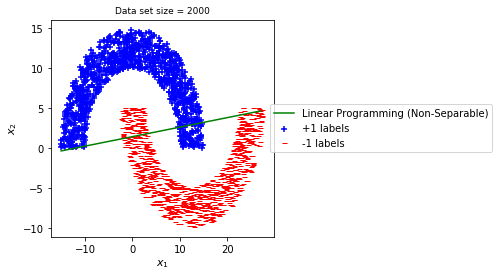

In [66]:
figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

ps = ax.scatter(positives[['x1']].values, positives[['x2']].values, marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(negatives[['x1']].values, negatives[['x2']].values, marker=r'$-$', c= 'r', label='-1 labels')
print('Number of positive points: ', len(positives))
print('Number of negatives points: ', len(negatives))

x1 = np.arange(-(rad+thk), (rad+thk)+rad + thk/2)

ws = res.x[-3:]
norm_g = ws/ws[-1]
hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'g', label='Final Hypothesis')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Data set size = %s'%N, fontsize=9)
ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(['Linear Programming (Non-Separable)', 
           '+1 labels', '-1 labels', ], 
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
plt.show()

#### Problem 3.7 (d)
Compare with the linear regression approach with and without the 3rd order polynomial feature transform. 

* Without polynomial transform:
  * For separable data, both can find a solution that separate the data. Both computations are similar in their performance.
* Linear regression with polynomial: 
  * When deal with non-separable data, linear programming is very slow (several hours), it has to add extra $N$ $\xi$ into the unknown variables, even though we only need $3$ $w$ components. Compared to 3rd order polynomial transform, it only increases the dimension from 3 to 10. 
  * Also, linear programming was not able to generate line that can separate the points. Although it tries to minimize the errors.

#### Problem 3.8

For $E_{out}(h)=E_{x,y}\left[(h(x)-y)^2\right]$, take derivative w.r.t. $h$ and let it to be zero, we have

\begin{align*}
\frac{\partial{E_{out}(h)}}{\partial{h}}&=E_{x,y}\left[2(h(x)-y)\right]\\
&=2E_{x,y}[h(x)-y]\\
&=2E_xE_{y|x}\left[h(x)-y\right]\\
\end{align*}

To make this derivative equal to zero, it's suffice to have $E_{y|x}\left[h(x)-y\right]$ equal to 0. That is $E_{y|x}\left[h(x)-y\right] = E_{y|x}[h(x)]-E_{y|x}[y] = h(x) - E[y|x] = 0$.

Thus we obtain an optimal $h$, i.e. $h^{*}(x) = E[y|x]$.

If we treat $h^{*}$ as a deterministic target function, we can write $y=h^{*}(x) + \epsilon(x)$ where $\epsilon(x)$ is a noise variable. Take expectation on both sides of the equation, we have

\begin{align*}
E[y] &= E[h^{*}(x)] + E[\epsilon(x)]\\
&= E[E[y|x]] + E[\epsilon(x)]\\
&= E[y] + E[\epsilon(x)]\\
\end{align*}

From which we derive that $E[\epsilon(x)] = 0$.

#### Problem 3.9

\begin{align*}
E_{in}(w) &= \left(w-(X^TX)^{-1}X^Ty\right)^T\left(X^TX\right)\left(w-(X^TX)^{-1}X^Ty\right) + y^T\left(I-X(X^TX)^{-1}X^T\right)y\\
&= \left(w^T-y^TX(X^TX)^{-T}\right)\left(X^TX\right)\left(w-(X^TX)^{-1}X^Ty\right) + y^T\left(I-X(X^TX)^{-1}X^T\right)y\\
&= \left(w^TX^TX-y^TX(X^TX)^{-T}(X^TX)\right)\left(w-(X^TX)^{-1}X^Ty\right) + y^T\left(I-X(X^TX)^{-1}X^T\right)y\\
&= \left(w^TX^TX-y^TX\right)\left(w-(X^TX)^{-1}X^Ty\right) + y^T\left(I-X(X^TX)^{-1}X^T\right)y\\
&= w^TX^TXw-y^TXw-w^T(X^TX)(X^TX)^{-1}X^Ty + y^TX(X^TX)^{-1}X^Ty + y^T\left(I-X(X^TX)^{-1}X^T\right)y\\
&= w^TX^TXw-y^TXw-w^TX^Ty + y^TX(X^TX)^{-1}X^Ty + y^Ty -y^TX(X^TX)^{-1}X^Ty\\
&= w^TX^TXw-2w^TX^Ty + y^Ty\\
\end{align*}


The second to last step is because $y^TXw$ is a scalar, so $y^TXw=w^TX^Ty$. 
The last step shows that this formula agress with Equation (3.4).

From this equation, if we take derivative w.r.t. $w$, it's easy to see that the second term has no $w$, so it gives $0$, we only need take care of first term, let $A(w) = w - (X^TX)^{-1}X^Ty$, we have

\begin{align*}
\frac{\partial{E_{in}(w)}}{\partial{w}} &= \frac{\partial{\left(A^T(w)(X^TX)A(w)\right)}}{\partial{w}}\\
&= \left((X^TX)+(X^TX)^T\right)A(w)\\
&= 2(X^TX)\left(w - (X^TX)^{-1}X^Ty\right)\\
\end{align*}

Since $X^TX$ is positive definite, if we let the above derivative equal to zero, We obtain $w_{lin} = (X^TX)^{-1}X^Ty$. 

The in-sample error is thus:

$E_{in}(w_{lin}) =  y^T\left(I-X(X^TX)^{-1}X^T\right)y$

#### Problem 3.10

1. (a) Suppose $\lambda$ is an eigenvalue of $H$ and $v$ is the corresponding eigenvector. Then we have $Hv = \lambda v$, and $HHv=H\lambda v = \lambda Hv = \lambda^2 v$. Since we know $H^k = H$, on the left side, we have $HHv = Hv = \lambda v$, so we get $\lambda v = \lambda^2 v$. It's easy to see that $\lambda$ can only either $0$ or $1$.

1. (b) According to Spectral theorem, for a symmetric matrix $A$, we can write it as $A=U\Lambda U^T$, where $U$ is an orthonomal matrix and $\Lambda$ is a diagonial matrix with entries of eigenvalues from matrix $A$. Apply trace on both sides, we have

    $trace(A) = trace(U\Lambda U^T) = trace(U^TU\Lambda) = trace(\Lambda)$, where the last part is just sume of eigenvalues of $A$.
    
1. (c) From exercise 3.3(d), we have $trace(H)=d+1$, also from previous problem (b), we have $trace(H) = \sum^N_{k=1}\lambda_k$. So we have $\sum^N_{k=1}\lambda_k = d+1$. 

Now from problem (a) we know that $\lambda_k$'s are either $0$ or $1$, so there are exactly $d+1$ eigenvalues of $H$ are $1$.

The rank of a matrix can be defined as the number of non-zero eigenvalues of the matrix. So $H$ has a rank of $d+1$.

#### Problem 3.11

1. (a) Following exercise 3.4 and use the fact that $w_{lin} = (X^TX)^{-1}X^Ty$, for a given test point $x_t$, we have 

\begin{align*}
g(x_t) &= x_t^Tw_{lin} \\
&= x_t^T(X^TX)^{-1}X^Ty \\
&= x_t^T(X^TX)^{-1}X^T(Xw^*+\epsilon) \\
&= x_t^T(X^TX)^{-1}X^TXw^*+ x_t^T(X^TX)^{-1}X^T\epsilon \\
&= x_t^Tw^*+ x_t^T(X^TX)^{-1}X^T\epsilon\\
\end{align*}

On the other side, the $y$ at test point $x_t$ is: $y=x_t^Tw^* + \epsilon_{t}$, so we have

\begin{align*}
y - g(x_t) &= \epsilon_{t} -  x_t^T(X^TX)^{-1}X^T\epsilon\\
\end{align*}

Where $\epsilon_t$ is the noise realization for the test point and $\epsilon$ is the vector of noise realizations on the data.

1. (b) Take the expectation w.r.t. to the test point, i.e. $x_t$ and $\epsilon_t$, we have

\begin{align*}
E_{out} &= E\left[(y-g(x_t))^2\right]\\
&= E\left[\left(\epsilon_{t} -  x_t^T(X^TX)^{-1}X^T\epsilon\right)^2\right]\\
&= E\left[\epsilon_{t}^2 - 2\epsilon_{t}x_t^T(X^TX)^{-1}X^T\epsilon + (x_t^T(X^TX)^{-1}X^T\epsilon)(x_t^T(X^TX)^{-1}X^T\epsilon)^T\right]\text{Note the last term is a scalar}\\
&= E[\epsilon_t^2] - 2E\left[\epsilon_{t}x_t^T(X^TX)^{-1}X^T\epsilon\right] + E\left[x_t^T(X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-T}x_t\right]\\
&= \sigma^2-2E[\epsilon_{t}]E\left[x_t^T(X^TX)^{-1}X^T\epsilon\right] + E\left[trace\left(x_t^T(X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-T}x_t\right)\right]\\
&\text{In the last term we use the fact that trace on a scalar equals to the scalar}\\
&\text{We also apply the independence between }\;\epsilon_t\;\text{and}\;x_t. \\
&\text{Also note that }X\text{ and } \epsilon \text{ are non-random in this expectation}\\
&= \sigma^2 + E\left[trace\left(x_tx_t^T(X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-T}\right)\right]\\
&= \sigma^2 + trace\left(E\left[x_tx_t^T(X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-T}\right]\right)\\
&= \sigma^2 + trace\left(E[x_tx_t^T]E\left[(X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-1}\right]\right)\\
&= \sigma^2 + trace\left(\Sigma (X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-1}\right)\\
\end{align*}


1. (c) $\epsilon \epsilon^T$ is a $N \times N$ matrix, with entries $\epsilon_i\epsilon_j$. So $E_{\epsilon}[\epsilon \epsilon^T] = \sigma^2I$ where the expectation of $E[\epsilon_i\epsilon_j] = 0$ when $i\ne j$, otherwise $\sigma^2$.

1. (d) Take the expectation w.r.t. $\epsilon$, which is a $N\times 1$ vector. We have

\begin{align*}
E_{out} &= \sigma^2 + E_{\epsilon}\left[trace\left(\Sigma (X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-1}\right)\right]\\
&= \sigma^2 + trace\left(E_{\epsilon}\left[\Sigma (X^TX)^{-1}X^T\epsilon\epsilon^TX(X^TX)^{-1}\right]\right)\\
&= \sigma^2 + trace\left(E_{\epsilon}\left[\Sigma (X^TX)^{-1}X^T\right]E_{\epsilon}\left[\epsilon\epsilon^T\right]E_{\epsilon}\left[X(X^TX)^{-1}\right]\right)\\
&= \sigma^2 + trace\left(\Sigma (X^TX)^{-1}X^T\sigma^2 IX(X^TX)^{-1}\right)\\
&= \sigma^2 + \sigma^2 trace\left(\Sigma (X^TX)^{-1}X^TX(X^TX)^{-1}\right)\\
&= \sigma^2 + \sigma^2 trace\left(\Sigma (X^TX)^{-1}\right)\\
&= \sigma^2 + \frac{\sigma^2}{N} trace\left(\Sigma (\frac{1}{N}X^TX)^{-1}\right)\\
\end{align*}

Note that $\frac{1}{N}X^TX=\frac{1}{N}\sum^N_{n=1}x_nx^T_n$ is an $N$-sample estimate of $\Sigma$. So $\frac{1}{N}X^TX \approx \Sigma$, in such case, we have

$E_{out} = \sigma^2 + \frac{\sigma^2}{N} trace(I) = \sigma^2 + \frac{\sigma^2 (d+1)}{N}= \sigma^2(1+\frac{d+1}{N})$


1. (e) By law of large numbers $\frac{1}{N}X^TX$ converges in probability to $\Sigma$, so by continuity of the inverse at $\Sigma$, $\left(\frac{1}{N}X^TX\right)^{-1}$ converges in probability to $\Sigma^{-1}$. $trace\left(\Sigma (\frac{1}{N}X^TX)^{-1}\right) = trace(I) + o(1)$, so we have $E_{out} = \sigma^2 + \frac{\sigma^2}{N}(d+1+o(1)) = \sigma^2\left(1+\frac{d+1}{N} + o(\frac{1}{N})\right)$

#### Problem 3.12

$H^2 = X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T = H$ so $H$ is a projection matrix. 

The $\hat{y}$ is the projection of $y$ onto the space spanned by $X$.

#### Problem 3.13

* (a) Suppose $x$ has a dimension of $d$, when we convert to classification problem, the new $x_{class}$ has a dimension of $d+1$, with $y$ in the extra dimension. So the classification problem has $d+2$ weights, where we count the weight for constant. 
  On the other hand, the linear regression needs only $d+1$ weights. 
  
* (b) The linear fit wegiths $w$, where $h(x) = w^Tx$. The weights of solving the classification is $w_{class} = (w^c_0, w^c_1, \dots, w^c_d, w^c_{d+1})$, where $w^c_{d+1}$ is the weight corresponding to the original $y$s. Since it solves the classification problem, it defines the line that separting the points, i.e. $w_{class}^T\hat{x} = 0$, where $\hat{x} = \begin{bmatrix}x\\y\end{bmatrix}$, so we have

\begin{align*}
w_{class}^T\hat{x} &= w_{class}^T\begin{bmatrix}x\\y\end{bmatrix}\\
&= \begin{bmatrix}w^c & w^c_{d+1}\end{bmatrix} \begin{bmatrix}x\\y\end{bmatrix}\\
&= (w^c)^Tx + w^c_{d+1}y \\
&= 0
\end{align*}

  Move $y$ to the left hand side of the equation, and divide both sides by $w^c_{d+1}$, we have $y = -(w^c)^T x / w^c_{d+1}$, so the linear regression weights $w = -\frac{(w^c)^T}{w^c_{d+1}}$.

Liner regression coefficients:  [[-0.18553388]
 [ 1.01062413]]


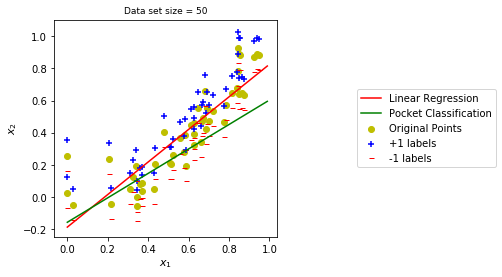

In [54]:
#### Problem 3.13 (c) (d)
import libs.linear_models as lm
import libs.data_util as data

N = 50
sigma = 0.1
dim = 1
mu = 0
gaussian_sigma = 1
delta = np.array([0, 0.1])

def generate_y(x, sigma, epsilons):
    y = x**2 + sigma * epsilons
    return y

def move_data(xys, delta):
    return xys + delta, xys - delta
    
xs = data.generate_random_numbers01(N, dim, 1000) #uniform on [0,1]
epsilons = np.random.normal(mu, gaussian_sigma, N)
ys = generate_y(xs, sigma, epsilons.reshape(-1, 1))
xys = np.hstack([xs, ys])
dps, dms = move_data(xys, delta)
df1 = pd.DataFrame({'x0':np.ones(N)})
df1['x1'] = dps[:,0]
df1['x2'] = dps[:,1]
df1['y'] = 1

df2 = pd.DataFrame({'x0':np.ones(N)})
df2['x1'] = dms[:,0]
df2['x2'] = dms[:,1]
df2['y'] = -1
df = pd.concat([df1,df2])

figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)

original_points = ax.scatter(xs, ys, marker='o', c= 'y', label='Original Points')
ps = ax.scatter(dps[:,0], dps[:, 1], marker='+', c= 'b', label='+1 labels')
ns = ax.scatter(dms[:,0], dms[:, 1], marker=r'$-$', c= 'r', label='-1 labels')

x1 = np.arange(0,1,0.01)
x1s = np.zeros((xs.shape[0], xs.shape[1]+1))
x1s[:, 0] = 1
x1s[:, 1] = xs.flatten()

w_lin = lm.linear_regression(x1s, ys)
print('Liner regression coefficients: ', w_lin)
linear = ax.plot(x1, (w_lin[0]+w_lin[1]*x1), c = 'r', label='Linear Regression')


maxit = 1000
eta = 0.5
randomized = False
print_out = False
w_pocket, w_ts, what_ts, test_w_ts, test_what_ts = lm.pocket_algo(df.values, 2, 
                                                           maxit,eta, randomized, 
                                                           print_out, None)


linear_pocket = ax.plot(x1, -(w_pocket[0]+w_pocket[1]*x1), c = 'g', label='Pocket Classification')



ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Data set size = %s'%N, fontsize=9)
ax.axis('tight')
legend_x = 2.0
legend_y = 0.5
ax.legend(['Linear Regression', 'Pocket Classification', 'Original Points',
           '+1 labels', '-1 labels', ], 
          loc='center right', bbox_to_anchor=(legend_x, legend_y))
#ax.set_ylim(bottom=lb, top=ub)
plt.show()

#### Problem 3.13 (d)
From above graph, we can see that the classification line sometimes can be close to the linear regression line in this case. However, as the $a$ increases, clearly the classification will a worse job. Even when $a$ is not so big, the classification's job is to separate the points, but this is not necessarily along the line that fit the original data. It can be a good start point for linear regression though.

#### Problem 3.14

* (a) The average function is:

\begin{align*}
\bar{g}(x) &= E_{\mathcal{D}}\left[g^{\mathcal{D}}(x)\right]\\
&= E_{\mathcal{D}}\left[x^Tw_{lin}\right]\\
&= E_{\mathcal{D}}\left[x^T(X^TX)^{-1}X^Ty\right]\\
&= E_{\mathcal{D}}\left[x^T(X^TX)^{-1}X^T(Xw+\epsilon)\right]\\
&= E_{\mathcal{D}}\left[x^T(X^TX)^{-1}X^TXw+x^T(X^TX)^{-1}X^T\epsilon\right]\\
&= E_{\mathcal{D}}\left[x^Tw+x^T(X^TX)^{-1}X^T\epsilon\right]\\
&= x^Tw+E_{\mathcal{D}}\left[x^T(X^TX)^{-1}X^T\epsilon\right]\\
&= x^Tw+x^TE_{\mathcal{D}}\left[(X^TX)^{-1}X^T\right]E_{\mathcal{D}}[\epsilon]\\
&= x^Tw\\
&= f(x)\\
\end{align*}

Note the $\epsilon$ in the data set is independent of $X$ by assumption.

* (b) The variance is:

\begin{align*}
\text{variance} &= E_{x}E_{\mathcal{D}}\left[\left(g^{\mathcal{D}}(x)-\bar{g}(x)\right)^2\right]\\
&= E_{x}E_{\mathcal{D}}\left[\left(g^{\mathcal{D}}(x)-f(x)\right)^2\right]\\
&= E_{x}E_{\mathcal{D}}\left[\left(g^{\mathcal{D}}(x)-(y_x-\epsilon_x)\right)^2\right]\\
&= E_{x}E_{\mathcal{D}}\left[\left(g^{\mathcal{D}}(x)-y_x+\epsilon_x\right)^2\right]\\
&= E_{x}E_{\mathcal{D}}\left[\left(y_x-g^{\mathcal{D}}(x)-\epsilon_x\right)^2\right]\\
&= E_{\mathcal{D}}E_{x}\left[\left(y_x-g^{\mathcal{D}}(x)\right)^2-2\epsilon_x\left(y_x-g^{\mathcal{D}}(x)\right) + \epsilon_x^2\right]\\
&= E_{\mathcal{D}}E_{x}\left[\left(y_x-g^{\mathcal{D}}(x)\right)^2\right]-2E_{\mathcal{D}}E_{x}\left[\epsilon_x\left(y_x-g^{\mathcal{D}}(x)\right)\right] + E_{\mathcal{D}}E_{x}\left[\epsilon_x^2\right]\\
&= E_{\mathcal{D}}E_{x}\left[\left(y_x-g^{\mathcal{D}}(x)\right)^2\right]-2E_{\mathcal{D}}E_{x}\left[\epsilon_x\left(f(x)+\epsilon_x-g^{\mathcal{D}}(x)\right)\right]+\sigma^2\\
&= E_{\mathcal{D}}E_{x}\left[\left(y_x-g^{\mathcal{D}}(x)\right)^2\right]-2E_{\mathcal{D}}E_{x}[\epsilon_xf(x)]-2E_{\mathcal{D}}E_{x}[\epsilon_x^2]+2E_{\mathcal{D}}E_{x}[\epsilon_x g^{\mathcal{D}}(x)]+\sigma^2\\
&= E_{\mathcal{D}}E_{x}\left[\left(y_x-g^{\mathcal{D}}(x)\right)^2\right] - 2\sigma^2 + \sigma^2\\
&= E_{\mathcal{D}}E_{x}\left[\left(y_x-g^{\mathcal{D}}(x)\right)^2\right] - \sigma^2\\
&= \sigma^2\left(1+\frac{d+1}{N} + o(\frac{1}{N})\right)  - \sigma^2\\
&= \sigma^2\left(\frac{d+1}{N} + o(\frac{1}{N})\right)\\
\end{align*}

Where we have used the result of problem 3.11 for the first term.

Notice that the bias is zero due to result (a). So we recovered the bias-variance decomposition for noisy data, where $E_{\mathcal{D}}\left[E_{out}(g^{\mathcal{D}}\right] = \sigma^2 + bias + variance$

#### Problem 3.15

* (a) We know that $rank(X) = \rho$, by the property of rank, we have $rank(X) = rank(X^TX)$. 
Note the dimension of $X^TX$ is $(d+1)\times (d+1)$, and if $X^TX$ is not invertible, then $rank(X^TX) \lt d+1$, we thus have $\rho \lt d+1$.

* (b) 

\begin{align*}
X^TXw_{lin} &= X^TXV\Gamma^{-1}U^Ty \\
&= (U\Gamma V^T)^TU\Gamma V^TV\Gamma^{-1}U^Ty \\
&= V\Gamma^T U^T U\Gamma V^TV\Gamma^{-1}U^Ty \\
&= V\Gamma^2\Gamma^{-1}U^Ty\\
&= V\Gamma U^Ty\\
&= X^Ty\\
\end{align*}

* (c) TODO

#### Problem 3.16

* (a)
  * The expected cost if you accept the person is: $g(x)\times 0 + (1-g(x))c_a= (1-g(x))c_a$
  * The expected cost if you reject the person is: $g(x)c_r + (1-g(x))\times 0= g(x)c_r$

  * Question: Why use the predicted probabilities to calculate the expected cost instead of the true probabilities? 
  
* (b) To make it fair, let cost(accept) = cost(reject), we have $(1-g(x))c_a = g(x)c_r$, we have $g(x) = \frac{c_a}{c_a+c_r}$, which is the $\kappa$.

* (c) 
  * Supermarket: $\kappa = \frac{1}{1+10}=\frac{1}{11}$. The $\kappa$ is small. The supermarket is easy to accept a person's fingerprint. 
  * CIA: $\kappa = \frac{1000}{1000+1} = \frac{1000}{10001}$. The $\kappa$ is large, close to $1$, so most of time, the logistic regression algorithm won't accept a person's fingerprint unless it's very confident. 

#### Problem 3.17

* (a) Let's use the Taylor expansion of $e^x$ here, where $e^x = 1 + x + x^2/2! + x^3/3! + \dots$. So we have

\begin{align*}
E(u+\Delta u,v + \Delta v) &= e^{u+\Delta u} + e^{2(v+\Delta v)}+ e^{(u+\Delta u)(v+\Delta v)} \\
&+ (u+\Delta u)^2 -3(u+\Delta u)(v+\Delta v) \\
&+ 4(v+\Delta v)^2 -3(u+\Delta u) - 5(v+\Delta v) \\
&= \left(1+(u+\Delta u) + \frac{(u+\Delta u)^2}{2}\right) \\
&+ \left(1+2(v+\Delta v)+\frac{4(v+\Delta v)^2}{2}\right) \\
&+ \left(1+(u+\Delta u)(v+\Delta v) + \frac{(u+\Delta u)^2(v+\Delta v)^2}{2}\right) \\
&+ (u+\Delta u)^2 -3(u+\Delta u)(v+\Delta v) \\
&+ 4(v+\Delta v)^2 -3(u+\Delta u) - 5(v+\Delta v)\\
\end{align*}

At $(u,v)=(0,0)$, take the first-order Taylor's expansion of $E$, we have 

\begin{align*}
E(u,v) &\approx \hat{E}_1 \\
&= 1 + \Delta u + 1 + 2\Delta v + 1  -3\Delta u - 5\Delta v\\
&= -2\Delta u -3\Delta v + 3
\end{align*}

so $a_u = -2$, $a_v = -3$, and $a=3$.

* (b) To satisfy $\|\left(\Delta u, \Delta v\right)\| = 0.5$, let $\Delta u = 0.5\cos\theta$ and $\Delta v = 0.5\sin\theta$, then $E(u,v) = -\cos\theta - 1.5\sin\theta + 3$. Take derivative w.r.t. $\theta$ and set it to $0$, we have

\begin{align*}
\sin\theta - 1.5\cos\theta &= 0\\
\sin\theta = 1.5\cos\theta\\
\end{align*}

Take $\sin\theta^2 + \cos\theta^2 = 1$, we have $\cos\theta = \frac{2}{\sqrt{13}}$ and $\sin\theta = \frac{3}{\sqrt{13}}$. 

The optimal $(\Delta u, \Delta v)$ is thus $(\frac{1}{\sqrt{13}}, \frac{3}{2\sqrt{13}})$. The resulting $E(u+\Delta u, v+\Delta v)$ is computed below using the optimal $(\Delta u, \Delta v)$ here.

Now we compute the gradient $\nabla E(u,v)$.

\begin{align*}
\nabla E(u,v) &= \left[\frac{\partial{E}}{\partial{u}}, \frac{\partial{E}}{\partial{v}}\right]^T\\
&= \left[e^u+ve^{uv}+2u-3v-3, 2e^{2v}+ue^{uv}-3u+8v-5\right]^T
\end{align*}

At point $(u,v) = (0,0)$, we have $\nabla E(0,0) = (-2, -3)$.

The optimal $(\Delta u, \Delta v)$ is parallel to the negative gradient direction, i.e. $-\nabla E(0,0) = (2,3)$, which is consistent with the results computed above. 


* (c) Approximate $E(u+\Delta u, v + \Delta v)$ by $\hat{E}_2(\Delta u, \Delta v)$ around $(u,v) = (0,0)$, we have

\begin{align*}
\hat{E}_2(\Delta u, \Delta v) &= (1+\Delta u + \frac{1}{2}\Delta u^2) \\
&+ (1+2\Delta v + 2\Delta v^2) + (1+\Delta u\Delta v) \\
&+ \Delta u^2 -3\Delta u\Delta v + 4\Delta v^2 -3\Delta u -5\Delta v\\
&= \frac{3}{2}\Delta u^2 + 6\Delta v^2 -2\Delta u\Delta v -2\Delta u -3\Delta v + 3\\
\end{align*}

So $b_{uu} = \frac{3}{2}$, $b_{vv} = 6$, $b_{uv}=-2$, $b_u = -2$, $b_v = -3$, $b=3$.

* (d) Take derivatives of $\hat{E}_2(\Delta u, \Delta v)$ w.r.t. $\Delta u$ and $\Delta v$ and let them equal to $0$, we have

\begin{align*}
\frac{\partial{\hat{E}_2}}{\partial{\Delta u}} &= 3\Delta u -2\Delta v -2 = 0 \\
\frac{\partial{\hat{E}_2}}{\partial{\Delta v}} &= 12\Delta v -2\Delta u -3 = 0\\
\end{align*}

Write above equations in matrix form, we have

\begin{align*}
\begin{bmatrix} 
\frac{\partial{\hat{E}_2}}{\partial{\Delta u}}\\ 
\frac{\partial{\hat{E}_2}}{\partial{\Delta v}}\\
\end{bmatrix}
&= \begin{bmatrix} 
3 & -2\\ 
-2 & 12\\
\end{bmatrix}
\begin{bmatrix} 
\Delta u\\ 
\Delta v\\
\end{bmatrix}
=\begin{bmatrix} 
2\\ 
3\\
\end{bmatrix}\\
&=-\nabla E(0,0)\\
\end{align*}

Solve the two functions we have 

\begin{align*}
(\Delta u^*, \Delta v^*) &= (\frac{30}{32}, \frac{13}{32})\\
\end{align*}

We compute $\nabla^2 E(u,v)$. Take the $\nabla E(u,v)$ computed above in problem (b), we have

\begin{align*}
\nabla^2 E(u,v)&= \begin{bmatrix} 
\frac{\partial{\nabla E(u,v)}}{\partial{u}}\\ 
\frac{\partial{\nabla E(u,v)}}{\partial{v}}\\ 
\end{bmatrix}\\
&= \begin{bmatrix} 
\frac{\partial{\nabla E_u(u,v)}}{\partial{u}} & \frac{\partial{\nabla E_u(u,v)}}{\partial{v}}\\ 
\frac{\partial{\nabla E_v(u,v)}}{\partial{u}} & \frac{\partial{\nabla E_v(u,v)}}{\partial{v}}\\
\end{bmatrix}\\
&= \begin{bmatrix} 
e^u + v^2e^{uv} +2 & e^{uv} + uve^{uv}-3\\ 
e^{uv} + uve^{uv} -3 & 4e^{2v}+u^2e^{uv}+8\\
\end{bmatrix}\\
\end{align*}

At point $(u,v)=(0,0)$, we have $\nabla^2 E(0,0) = \begin{bmatrix} 
3 & -2\\ 
-2 & 12\\
\end{bmatrix}$

We can see that this $\nabla^2 E(0,0)$ is the same matrix as above when we take derivative of $\hat{E}_2(\Delta u, \Delta v)$ w.r.t. $\Delta u$ and $\Delta v$. That equation then becomes

\begin{align*}
\begin{bmatrix} 
\frac{\partial{\hat{E}_2}}{\partial{\Delta u}}\\ 
\frac{\partial{\hat{E}_2}}{\partial{\Delta v}}\\
\end{bmatrix}
&= \nabla^2 E(0,0)
\begin{bmatrix} 
\Delta u\\ 
\Delta v\\
\end{bmatrix}\\
&=-\nabla E(0,0)\\
\end{align*}

Since $\nabla^2 E(0,0)$ is positive definite, we can solve for the optimal $(\Delta u, \Delta v)$ and have

\begin{align*}
\begin{bmatrix} 
\Delta u^*\\ 
\Delta v^*\\
\end{bmatrix}
=-\left(\nabla^2 E(0,0)\right)^{-1}\nabla E(0,0)\\
\end{align*}

Solve the above equation, we obtain the same solution as 

\begin{align*}
(\Delta u^*, \Delta v^*) &= (\frac{30}{32}, \frac{13}{32})\\
\end{align*}

In [21]:
import numpy as np
from scipy.optimize import minimize
from functools import partial
import math

#### problem 3.17 (e-i)
def find_newton_direction(u,v,norm):
    multipler = norm**2 / (u**2 + v**2)
    return u * np.sqrt(multipler), v*np.sqrt(multipler)

def calc_E(x):
    u, v = x[0], x[1]
    return np.exp(u) + np.exp(2.0*v) + np.exp(u*v) + u**2 - 3*u*v + 4*v**2 - 3*u - 5*v

def calc_E_with_length(theta, norm):
    '''Compute the E value with fixed length of (du, dv)
    '''
    u, v = norm*math.sin(theta), norm*math.cos(theta)
    return np.exp(u) + np.exp(2.0*v) + np.exp(u*v) + u**2 - 3*u*v + 4*v**2 - 3*u - 5*v

# Note, we only compare values at point (u=0, v=0)
print('E(u+du,v+dv) with (du,dv) from E_1 approximation: ', calc_E([1/np.sqrt(13),3/np.sqrt(13)/2]))
new_u, new_v = find_newton_direction(30/32, 13/32, 0.5)
print('Newton direction: (', new_u, ',', new_v, ')')
new_E = calc_E([new_u, new_v])
print('E(u+du,v+dv) = ', new_E)

calc_E_half = partial(calc_E_with_length, norm=0.5)
x0 = 0
res = minimize(calc_E_half, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
print('Optimal direction by minimizing E(u+du,v+dv): ', 0.5*math.sin(res.x), 0.5*math.cos(res.x))
print('Minimal E(u+du, v+dv): ', res.fun)

E(u+du,v+dv) with (du,dv) from E_1 approximation:  2.2508597349929693
Newton direction: ( 0.4587778126549621 , 0.19880371881715023 )
E(u+du,v+dv) =  1.8904907903020918
Optimization terminated successfully.
         Current function value: 1.868437
         Iterations: 38
         Function evaluations: 76
Optimal direction by minimizing E(u+du,v+dv):  0.4355689881974021 0.2455191571358361
Minimal E(u+du, v+dv):  1.8684370301391746


* (e) From above numerical calculations, we can see that:
  * $\hat{E}_1$ is not a good approximation to $E(u+\Delta u, v+\Delta v)$ since it has larger difference compared to $\hat{E}_2$ approximation. 
  * Newton direction is very close to the optimal direction obtained by minimizing $E(u+\Delta u, v+\Delta v)$. The value computed with Newton direction is just a little bit larger than the minimal value. 

#### Problem 3.18 TODO

#### Problem 3.19

* (a) Suppose $x$ has a dimension of $d$, $\Phi(x)$ converts each $x_n$ into a point of $N$ dimension, where $N$ is the total number of points. PLA shall be able to shatter $N+1$ points which is a super set of the $N$ points. The problem is with the generalization error bound. According to the VC bound, $E_{out} \le E_{in} + \sqrt{\frac{d\ln N}{N}}$, when we do feature transformation using $\Phi(x)$, the $d=N$, so we see that the error is increasing with $\sqrt{\ln N}$, which is underiable.

* (b) We have $\Phi(x) = \left(\phi_1(x),\phi_2(x),\dots,\phi_N(x)\right)$, this is similar to problem (a) in that we convert from $d$ dimension to $N$ dimension. So it has the same generalization issue. The difference is that the values for $\Phi(x_n)$ are not all zeroes when $x_i \ne x_n$. So one has to store all elements for each $x_n$. When the $N$ is large, the storage is significant.

* (c) This transformation converts the $x$ to a fixed number of grids. For example, in 2-D, each $x$ is transformed to a set of $101*101$ points. This will cause problem when the dimension of original $x$ is large, then each point will be converted to $101^d$-dimension point. It just can't handle data points with large dimension. Also, to get a good generalization error bound, the number of points $N$ should be much larger than $101^d$, this is a high requirement.